In [1]:
from ucimlrepo import fetch_ucirepo

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr

In [2]:
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 
  
# metadata 
print(productivity_prediction_of_garment_employees.metadata) 
  
# variable information 
print(productivity_prediction_of_garment_employees.variables) 

{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'ID': 399, 'type': 'NATIVE', 'title': 'Mining the productivity dat

In [4]:
X['wip'] = X['wip'].fillna(0)

C:\Users\Marcell\AppData\Local\Temp\ipykernel_24472\1332751646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['wip'] = X['wip'].fillna(0)


In [5]:
y

,actual_productivity
0,0.940725
1,0.886500
2,0.800570
3,0.800570
4,0.800382
...,...
1192,0.628333
1193,0.625625
1194,0.625625
1195,0.505889


In [6]:
df_full = pd.concat([X, y], axis=1)

In [7]:
df_full.head(1)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725


In [9]:
selected_vars = 5 # from 5
start_time = None
end_time = None

In [10]:
df_filtered = df_full.iloc[start_time:end_time, selected_vars:]

In [11]:
df_full_pp = pp.DataFrame(df_filtered.values, 
                         datatime = {0:np.arange(len(df_filtered))}, 
                         var_names=df_filtered.columns)

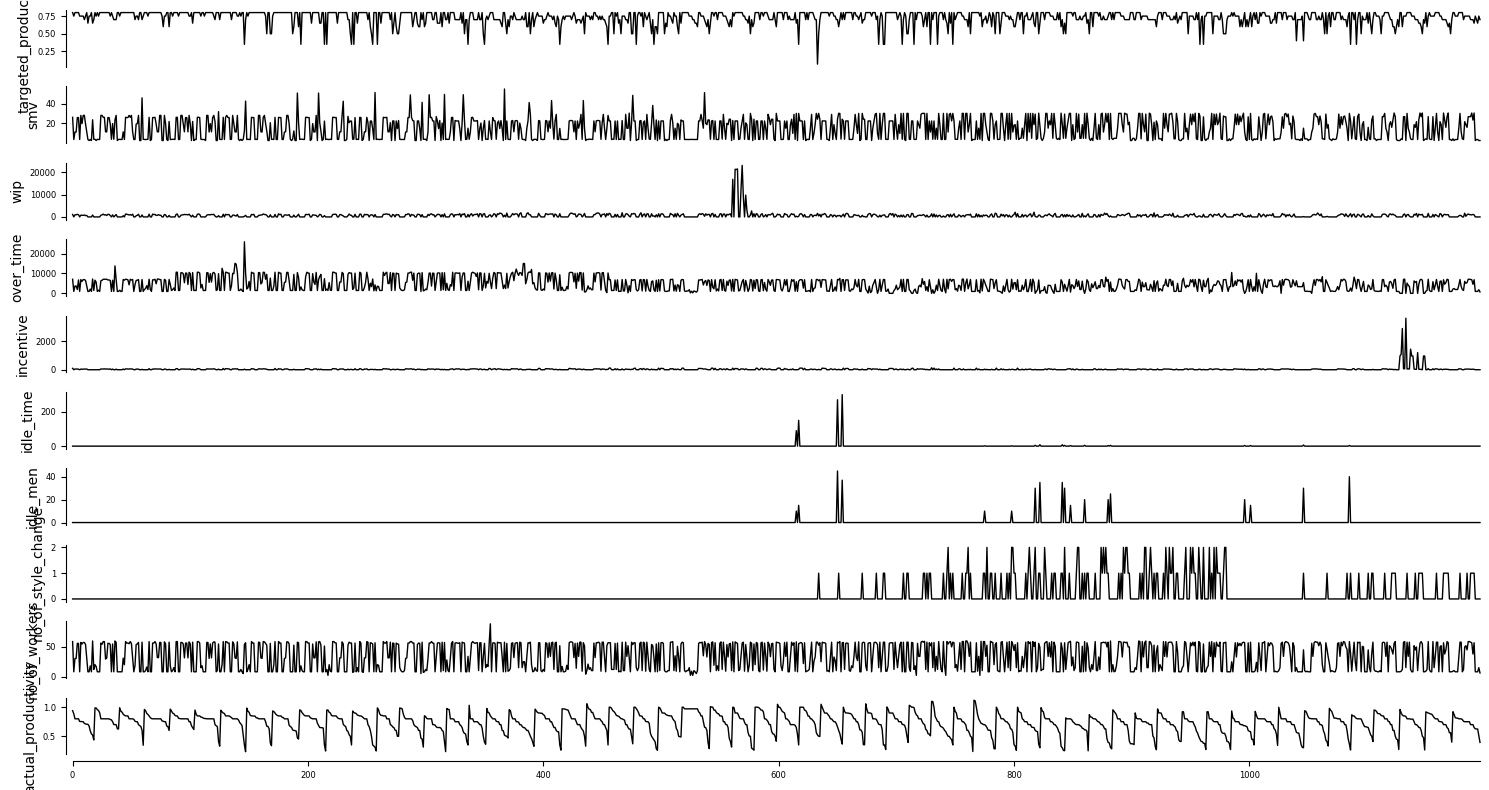

In [12]:
tp.plot_timeseries(df_full_pp, figsize=(15, 8))
plt.show()

In [13]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=df_full_pp, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


In [14]:
correlations.shape

(10, 10, 21)

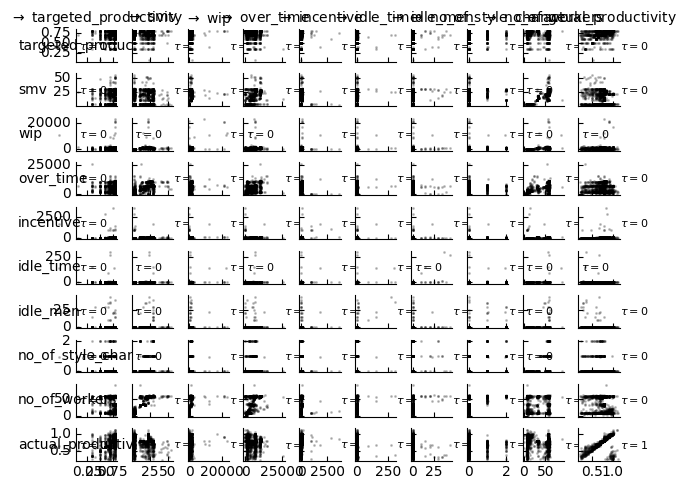

In [15]:
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=df_full_pp, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()

In [16]:
# tp.plot_densityplots(dataframe=df_full_pp, add_densityplot_args={'matrix_lags':matrix_lags})
# plt.show()

In [17]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=df_full_pp, 
    cond_ind_test=parcorr,
    verbosity=1)

In [18]:
#correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
#lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names': df_filtered.columns, 
#                                    'x_base':5, 'y_base':.5}); #plt.show()

In [19]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=10, pc_alpha=None, alpha_level=0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 10
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable targeted_productivity has 7 link(s):
    [pc_alpha = 0.2]
        (actual_productivity -1): max_pval = 0.00000, |min_val| =  0.248
        (actual_productivity -10): max_pval = 0.03073, |min_val| =  0.063
        (idle_men -5): max_pval = 0.03774, |min_val| =  0.061
        (targeted_productivity -7): max_pval = 0.09027, |min_val| =  0.050
        (no_of_workers -6): max_pval = 0.13684, |min_val| =  0.043
        (idle_men -8): max_pval = 0.15016, |min_val| =  0.042
        (smv -3): max_pval = 0.15661, |min_val| =  0.041

    Variable smv has 26 link(s):
    [pc_alpha = 0.5]
        (actual_productivity -4): max_pval = 0.00908, |min_val| =  0.077
        (targeted_productivity -2): max_pval = 0.01180, |min_val| =  0.

In [21]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=10, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.01, 
            tau_min=0, tau_max=10, link_assumptions=None)
results['graph'] = graph


## Significant links at alpha = 0.01:

    Variable targeted_productivity has 6 link(s):
        (actual_productivity  0): pval = 0.00000 | val =  0.282
        (actual_productivity -1): pval = 0.00000 | val =  0.238
        (no_of_style_change  0): pval = 0.00000 | val = -0.200
        (over_time  0): pval = 0.00005 | val = -0.119
        (no_of_workers  0): pval = 0.00006 | val = -0.118
        (smv  0): pval = 0.00623 | val = -0.081

    Variable smv has 8 link(s):
        (no_of_workers  0): pval = 0.00000 | val =  0.904
        (over_time  0): pval = 0.00000 | val =  0.702
        (wip  0): pval = 0.00000 | val =  0.353
        (no_of_style_change  0): pval = 0.00000 | val =  0.322
        (actual_productivity  0): pval = 0.00001 | val = -0.132
        (smv -8): pval = 0.00947 | val = -0.110
        (idle_men  0): pval = 0.00027 | val =  0.108
        (targeted_productivity  0): pval = 0.00623 | val = -0.081

    Variable wip has 9 link(s):
        (no_of_workers  0): pval = 0.00

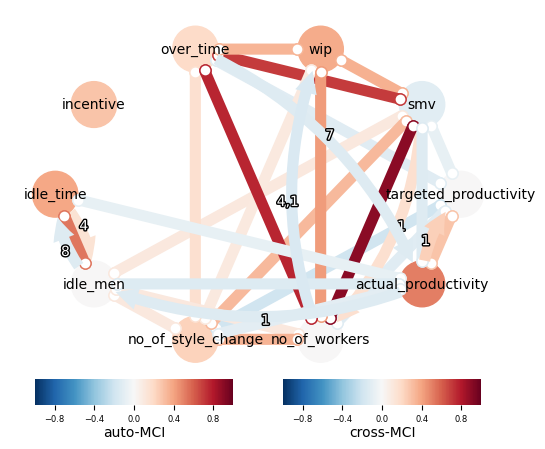

In [22]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=df_filtered.columns,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

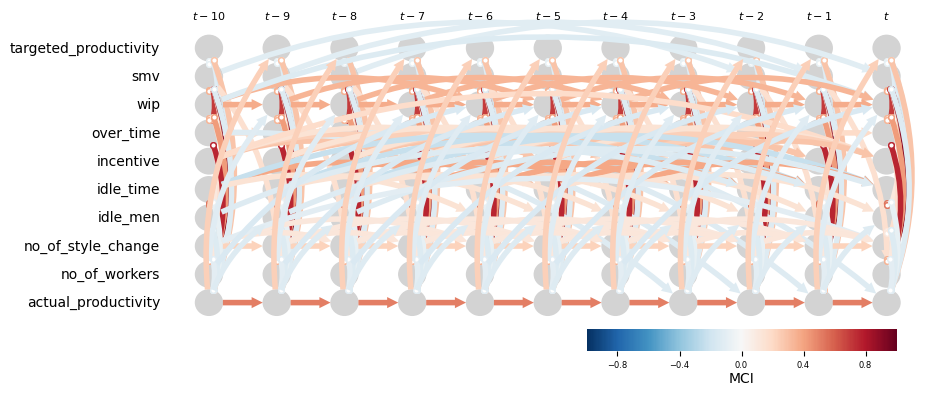

In [23]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(10, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=df_filtered.columns,
    link_colorbar_label='MCI',
    ); plt.show()